# <font color='firebrick'>Problem Set \#3:</font> Due Sunday, November 13, 2022

> The agency had found that Volkswagen had intentionally programmed turbocharged direct injection (TDI) diesel engines to activate their emissions controls only during laboratory emissions testing, which caused the vehicles' NOx output to meet US standards during regulatory testing, while they emitted up to 40 times more NOx in real-world driving. Volkswagen deployed this software in about 11 million cars worldwide, including 500,000 in the United States, in model years 2009 through 2015."<br><br> United States Environmental Protection Agency, September 20, 2015

The goal of this analysis is to estimate the impact the Volkswagen emissions scandal had on their stock price. To estimate the impact, you will build a counterfactual synthetic control using other stocks (automotive and non-automotive companies) that correlate with the Volkswagen stock druing the years prior to the "dieselgate" scandal. You will then compare the synthetic control group to the empirical Volkswagen stock data after the scandal.

Answer the questions below. This notebook will be your workspace so add cells as you please. when you're done, submit your notebook as a pdf. [To print: From the file menu, choose 'print preview'. A new tab will open with the notebook presented as html. Print as a pdf.] Save your pdf notebook with the naming convention **'PS3_[insert last name]'**. For example, 'PS3_Thurk.pdf'. 

**You can work with others on this assignment but must turn in your own solutions.**

**Grading:** The problem set is worth **80 points** and partial credit is indicated for each exercise.

**A reminder:** My office hours are Wednesdays 3:00PM-5:00PM EDT, Friday via Zoom, and by appointment (ie, send me an email and we'll set up a time). See the syllabus for the Zoom link.


# Name: <font color= red>Daniel Saul</font>

# Exercise 1: Load Data <font color=brown>[10 Points]</font>

The file `stock_prices.csv` includes daily stock prices from 2010 to 2020 for the NYSE plus international automakers not traded on the NYSE. All values are in nominal $US. Load the file and convert the date variable to `datetime`.

In [27]:
# import required packages
import pandas as pd
import numpy as np
import datetime as dt  

# load dataset
stock_prices = pd.read_csv('stock_prices.csv')

# convert the date variable to datetime
stock_prices['Date']= pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date')

stock_prices.columns.names = ['ticker']

#view dataset
stock_prices.head()

ticker,A,AA,AAP,AB,ABB,ABC,ABEV,ABG,ABM,ABR,...,XIN,XOM,XPO,XRX,Y,YPF,YUM,ZBH,ZION,ZNH
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.434929,36.938271,38.432693,10.787421,13.037512,22.101795,2.384545,11.83,16.024546,0.807032,...,2.409003,42.336399,1.770772,15.403704,253.453568,35.911705,19.706152,53.282867,11.218823,13.289250
2010-01-05,20.212959,35.784649,38.204258,10.776028,13.123807,21.944103,2.368118,12.39,15.906966,0.786549,...,2.457184,42.501713,1.770772,15.421552,253.361084,35.267979,19.638754,54.969589,11.614387,13.505470
2010-01-06,20.141132,37.648201,38.537392,10.779827,13.276489,21.736616,2.380835,12.76,15.906966,0.876674,...,2.510717,42.869068,1.729270,15.278762,253.444321,36.008259,19.498365,54.951843,12.624331,13.638530
2010-01-07,20.115025,36.849533,38.527885,10.787421,13.389338,21.388039,2.371562,13.05,16.111782,0.921737,...,2.494657,42.734360,1.715436,15.350155,251.539124,35.662262,19.492748,56.212440,14.038260,13.563684
2010-01-08,20.108498,37.759129,38.680153,11.117882,13.767720,21.620419,2.409185,13.15,16.096609,0.942220,...,2.457184,42.562931,1.770772,15.296607,250.105637,36.128960,19.498365,55.031742,13.811022,13.538734


In [28]:
# show datetime type
stock_prices.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2515, freq=None)

# Exercise 2: Data Visualization <font color=brown>[20 Points]</font>

Create a figure which shows the Volksagen stock price (VWAGY) over time. Annotate the figure to indicate when the EPA announced its results that Volkswagen had been cheating on its diesel emissions standards.

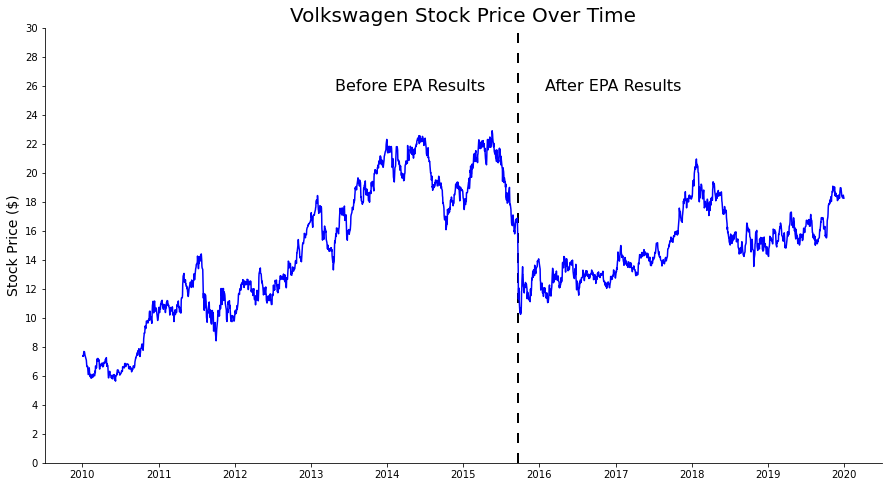

In [29]:
# import required packages
import matplotlib.pyplot as plt
import seaborn as sns

# create figure which shows the Volksagen stock price (VWAGY) over time
fig, ax = plt.subplots(figsize=(15,8))

# annotate the figure to indicate when the EPA announced its results
ax.axvline(x=dt.datetime(2015,9,20), ymin=0, ymax=1, color='black', linewidth=2.0, dashes=[5,5])
ax.annotate('After EPA Results',xy=(dt.datetime(2016,12,20),26),va='center',ha='center',size=16)
ax.annotate('Before EPA Results',xy=(dt.datetime(2014,4,20),26),va='center',ha='center',size=16)

ax.plot(stock_prices.index, stock_prices['VWAGY'],color='blue')

ax.set_ylim(0,30)
ax.set_yticks(np.arange(0, 30.01, step=2.0))
ax.set_ylabel('Stock Price ($)',size=14)
ax.set_xlabel(' ')
ax.set_title('Volkswagen Stock Price Over Time',size=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Exercise 3: Synthetic Control <font color=brown>[30 Points]</font>

## 3.1 Identify potential companies to include in the synthetic control group [10 Points]
Find stocks that are correlated with Volkswagen in the pre-period. Keep stocks for which the correlation is greater than 0.95.

In [30]:
stock_prices_pre_corr = stock_prices.copy()
stock_prices_pre_corr.drop(stock_prices[stock_prices['VWAGY'] == 0].index, inplace = True)
stock_prices_pre_corr.drop(stock_prices[stock_prices.index > dt.datetime(2015,9,20)].index, inplace = True) 

corr = stock_prices_pre_corr.corr()
interest = corr['VWAGY'].copy()

# sort values descending and remove any corr greater than 0.95
interest.sort_values(ascending=False, inplace=True)
interest.drop(interest.index[0], inplace=True)
interest = interest[interest > 0.95]

# print corr series
print("\nPre-Trend Correlations (>0.95)")
print(interest)


Pre-Trend Correlations (>0.95)
ticker
BMWYY    0.968955
GAB      0.967215
AME      0.966076
EMN      0.965598
ETN      0.964917
SPE      0.960534
GGG      0.959967
AMG      0.958286
MFD      0.954606
LIN      0.954211
FC       0.954130
NFJ      0.953820
KAMN     0.953136
POAHY    0.952696
GDV      0.950974
HOG      0.950952
ASGN     0.950508
Name: VWAGY, dtype: float64


In [31]:
# filter stock price dataframe for correlated companys
filtered_stocks = stock_prices[['BMWYY', 'GAB', 'AME', 'EMN', 'ETN', 'SPE', 'GGG', 'AMG', 'MFD', 'LIN', 'FC', 'NFJ', 'KAMN', 'POAHY', 'GDV', 'HOG', 'ASGN', 'VWAGY']]
filtered_stocks.head()

ticker,BMWYY,GAB,AME,EMN,ETN,SPE,GGG,AMG,MFD,LIN,FC,NFJ,KAMN,POAHY,GDV,HOG,ASGN,VWAGY
Date,,,,,,,,,,,,,,,,,,
2010-01-04,9.462170,1.512928,15.882857,22.810036,12.950365,6.000300,7.841926,66.736755,4.185970,62.840546,6.23,5.174665,19.130356,NaN,6.101944,19.422743,7.40,7.353887
2010-01-05,9.616277,1.518827,15.812899,22.518215,12.873857,5.996037,7.781031,67.269646,4.245911,61.669441,6.20,5.230456,19.000051,NaN,6.161364,19.567692,7.19,7.405192
2010-01-06,9.770385,1.530624,15.829358,22.366766,12.817480,5.996037,7.733377,68.587341,4.279212,62.216465,6.10,5.307170,19.171074,NaN,6.184216,19.521919,7.04,7.353887
2010-01-07,9.795041,1.527675,15.870505,22.422171,13.006742,5.983242,7.796916,68.277290,4.269222,62.378277,6.35,5.345528,19.415396,NaN,6.193357,19.682121,7.40,7.524907
2010-01-08,9.702577,1.530624,16.179113,22.481276,13.298692,5.983242,8.048429,67.647514,4.239251,62.786640,6.28,5.397832,19.537558,NaN,6.193357,19.476141,7.41,7.678825


## 3.2 Generate the Synthetic Control [20 Points]

Create a synthetic control group using the pre-period company stocks which are highly correlated with Volkswagen pre-period stock price. Make sure the weights sum to one. See the lecture on synthetic controls for the python code which does this.

In [32]:
from typing import List
from operator import add
from toolz import reduce, partial
from scipy.optimize import fmin_slsqp  # minimize as quadratic programming problem

# Define loss function (sum of squared errors)
def loss_w(W, X, y) -> float:
    return np.sqrt(np.mean((y - X.dot(W))**2))

# Define function to solve for weights with the condition that weights be positive and sum to one
def get_w(X, y):
    
    w_start = [1/X.shape[1]]*X.shape[1]

    weights = fmin_slsqp(partial(loss_w, X=X, y=y),
                         np.array(w_start),
                         f_eqcons=lambda x: np.sum(x) - 1,   # constrain weights sum to one
                         bounds=[(0.0, 1.0)]*len(w_start),   # constrain weights to be between zero and one
                         disp=False)                         # don't show progress
    return weights

def syn_control_weights(ticker):
    X = filtered_stocks.copy()
    X.drop(X[X.index > dt.datetime(2015,9,20)].index, inplace = True)
    
    y = X[ticker]
    X.drop(ticker, axis=1, inplace=True)

    # Fit the constrained model
    volks_weights = get_w(X, y)

    # Add synthetic data to sample
    X = filtered_stocks.copy()  # Use existing index
    X.drop(ticker, axis=1, inplace=True)

    control = pd.DataFrame(X.values.dot(volks_weights))

    # Add column to original dataframe making sure that the indexes match
    data = filtered_stocks.copy()  # Use existing index
    control = control.set_index(data.index) # Transfer main index to this new df
    data['Synthetic Control'] = control     # Add column to main dataset
    
    return data

# Exercise 4: Estimate the Impact of Dieselgate <font color=brown>[20 Points]</font>

## 4.1 Visualization [15 Points]

Create a 2-by-1 figure to visualize Volkswagen's stock price and the synthetic control group over time: 

* **Top graph:** Add the synthetic control data (pre- and post-period) to the Volkswagen stock price graph you created above. Make sure you include a legend so we know which line is which.


* **Bottom graph:** Plot the deviations of Volkswagen's stock price from the synthetic control group but convert these deviations from stock price to market capitalization. This will require you to do some hunting for the company's outstanding shares online. Remember, "market capitalization" is simply stock price times "shares outstanding." Just find a number for Volkswgaen outstanding shares (ie, keep things simple and don't look for shares outstanding by day, quarterly, etc).

In [33]:
subset = syn_control_weights('VWAGY')
shares_out = 5013000000
tau = subset['Synthetic Control'] - subset['VWAGY']
tau = shares_out * tau

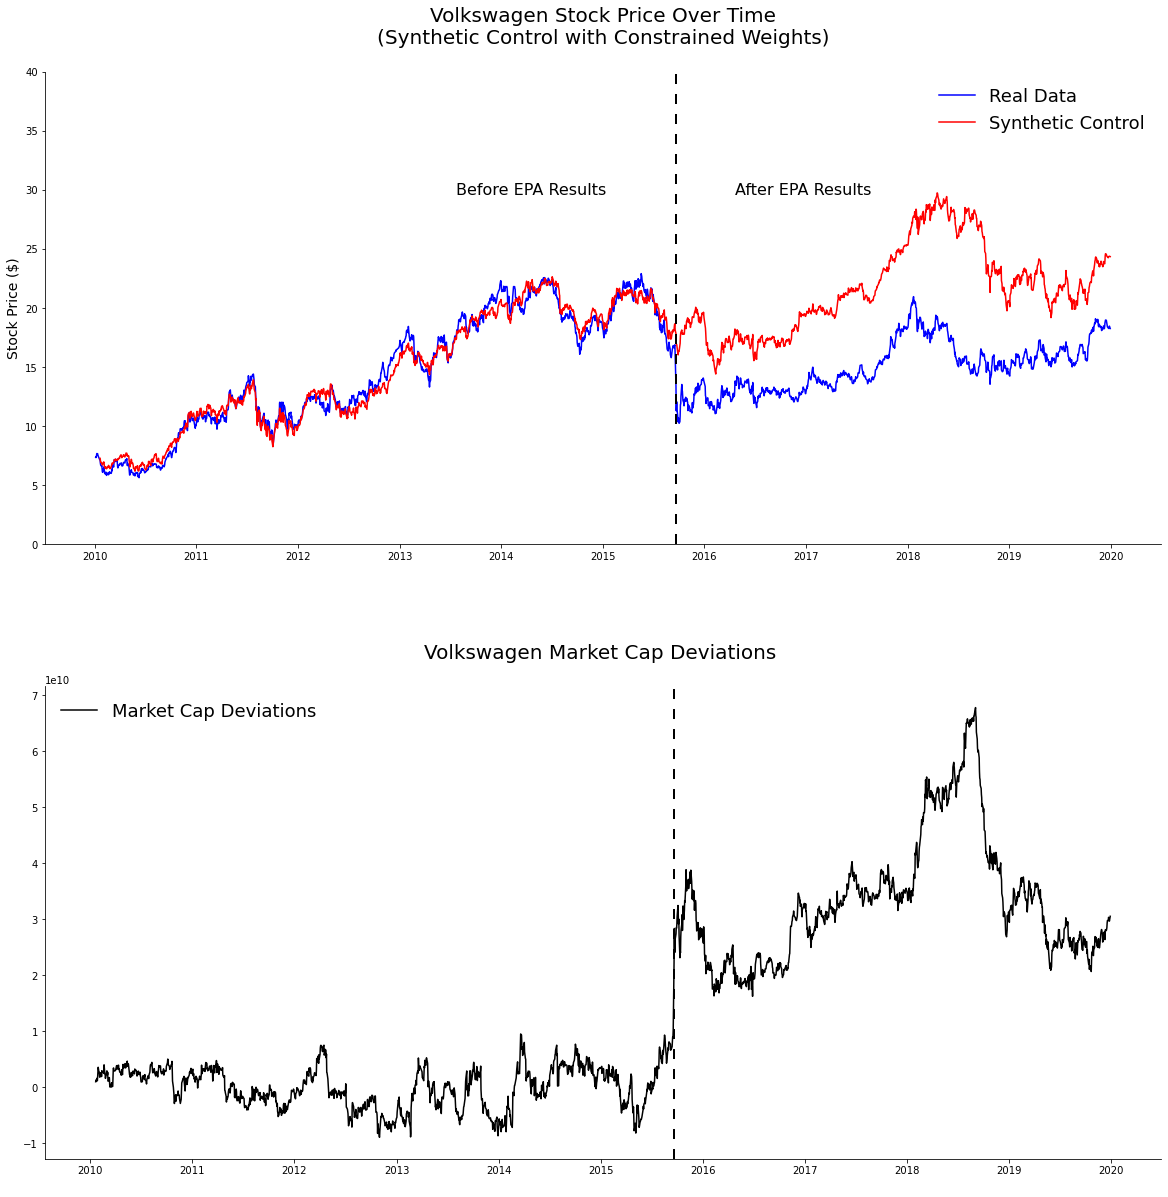

In [34]:
# Create Figure
fig, ax = plt.subplots(2,1,figsize=(20,20))

#--------------------------------------------
# Time-series: Synthetic Control vs Volkswagen
#--------------------------------------------
ax[0].plot(stock_prices.index, stock_prices['VWAGY'],color='blue',label='Real Data')
ax[0].plot(subset.index, subset['Synthetic Control'],color='red',label='Synthetic Control')
ax[0].legend(frameon=False)

ax[0].axvline(x=dt.datetime(2015,9,20), ymin=0, ymax=1, color='black', linewidth=2.0, dashes=[5,5])
ax[0].annotate('After EPA Results',xy=(dt.datetime(2016,12,20),30),va='center',ha='center',size=16)
ax[0].annotate('Before EPA Results',xy=(dt.datetime(2014,4,20),30),va='center',ha='center',size=16)

ax[0].legend(frameon=False,fontsize=18)
ax[0].set_ylim(0,40)
ax[0].set_yticks(np.arange(0, 40.01, step=5.0))
ax[0].set_ylabel('Stock Price ($)',size=14)
ax[0].set_xlabel(' ')
ax[0].set_title('Volkswagen Stock Price Over Time\n(Synthetic Control with Constrained Weights)\n',size=20)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

#--------------------------------------------
# Time-series of Tau
#--------------------------------------------
ax[1].plot(tau.index, tau, color='black',label='Market Cap Deviations')

ax[1].legend(frameon=False,fontsize=18)

ax[1].axvline(x=dt.datetime(2015,9,20), ymin=0, ymax=1, color='black', linewidth=2.0, dashes=[5,5])
#ax[1].annotate('After EPA Results',xy=(dt.datetime(2017,1,1),6),va='center',ha='center',size=16)
#ax[1].annotate('Before EPA Results',xy=(dt.datetime(2014,1,1),6),va='center',ha='center',size=16)

ax[1].set_xlabel(' ')
ax[1].set_title('Volkswagen Market Cap Deviations \n',size=20)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.subplots_adjust(hspace=.3)  # adjust white space between figures
plt.show()

## 4.2 Discussion [5 Points]

What were the short- and long-run effects of Dieselgate for the Volkswagen group? Write a short paragraph which summarizes your results and answers this question.

**Answer:** With regards to our first descriptive visualization, we can see that the Volkswagen stock was steadily increasing until the EPA released their results about the car company clearing emissions tests fraudulently. After this information was released, the stock price saw a sharp decline and then began to slowly see a steady increase. Furthermore, our analysis found that these pre-period companies were highly correlated with Volkswagen's stock price: BMWYY, GAB, AME, EMN, ETN, SPE, GGG, AMG, MFD, LIN, FC, NFJ, KAMN, POAHY, GDV, HOG, ASGN. The short-term effect of Dieselgate for Volkswagen was a drastic decrease in stock price. In the long-run, the stock price made a comeback, but the yield was on track to be higher if Dieselgate did not occur. Market capitalization deviations saw a large increase after the EPA results were released.